In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [7]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [8]:
data['pm2.5'].isna().sum()#值为NaN的

2067

In [9]:
#先将前面的24个去掉，剩下的进行填充

In [10]:
data = data.iloc[24:].fillna(method='ffill') #使用日期最近的数据进行填充 ffill前项填充

In [11]:
data['pm2.5'].isna().sum()

0

In [12]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [13]:
#将多列时间合并为一列

In [14]:
import datetime

In [15]:
datetime.datetime(year=2010, month=1, day=2, hour=1)

datetime.datetime(2010, 1, 2, 1, 0)

In [16]:
data['tm'] = data.apply(
    lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']),
    axis=1
)

In [17]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [18]:
data.drop(columns=['year','month','day','hour','No'],inplace=True)

In [19]:
data = data.set_index('tm')

In [20]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [21]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [22]:
data = data.join(pd.get_dummies(data.cbwd)) #将cbwd列赋值为独热编码

In [23]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [24]:
del data['cbwd']

In [25]:
data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [26]:
data.tail()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,249.85,0,0,0,1,0,0


In [27]:
#17.3

<AxesSubplot:xlabel='tm'>

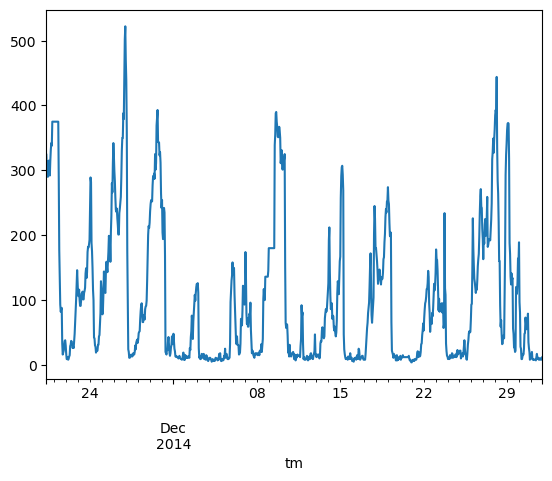

In [28]:
data['pm2.5'][-1000:].plot()

<AxesSubplot:xlabel='tm'>

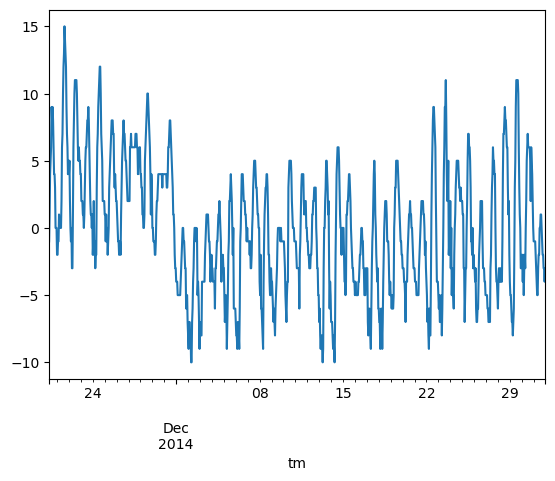

In [29]:
data['TEMP'][-1000:].plot()

In [30]:
seq_length = 5*24 #依据前五天的数据 作为train数据
delay = 24 #预测24小时的数据 作为目的label数据

In [31]:
data 

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [32]:
#提取六天数据
data_ = []
for i in range(len(data)-seq_length-delay):
    data_.append(data.iloc[i:i+seq_length+delay])

In [33]:
data_[0].shape

(144, 11)

In [34]:
#将数据变成array类型
data_ = np.array([df.values for df in data_])

In [35]:
data_.shape

(43656, 144, 11)

In [36]:
#乱序
np.random.shuffle(data_)

In [37]:
#划分train与label
x = data_[:, :5*24,:]

In [38]:
y = data_[:, -1, 0] #第二维取最后一个值，第三维取第一个值pm2.5

In [39]:
x.shape

(43656, 120, 11)

In [40]:
y.shape

(43656,)

In [41]:
#划分训练数据与测试数据

In [42]:
#已经shuffle,可以直接切片

In [43]:
split_b = int(data_.shape[0]*0.8)

In [44]:
train_x = x[:split_b]
train_y = y[:split_b]

test_x = x[split_b:]
test_y = y[split_b:]

In [45]:
train_x.shape, train_y.shape

((34924, 120, 11), (34924,))

In [46]:
test_x.shape, test_y.shape

((8732, 120, 11), (8732,))

In [47]:
#数据标准化
#是在训练数据的方差与均值

In [48]:
mean = train_x.mean(axis=0)#计算每一列的均值 axis=0是指每一列
std = train_x.std(axis=0)#方差

In [49]:
train_x = (train_x - mean)/std

In [50]:
test_x = (test_x - mean)/std

In [51]:
train_x.shape
#dense层需要二维数据

(34924, 120, 11)

In [52]:
batch_size = 128

In [53]:
#使用LSTM网络模型

In [54]:
train_x.shape #LSTM网络需要的就是三维的数据

(34924, 120, 11)

In [55]:
# old_model = keras.Sequential()
# old_model.add(layers.LSTM(32,input_shape=(120,11))) #LSTM网络需要的就是三维的数据 32是隐藏单元数 #如果需要堆叠多层需要设置return_seuences=True参数
# old_model.add(layers.Dense(1))

In [56]:
# old_model.compile(optimizer='adam',
#              loss='mae')#mae是平均绝对误差

In [57]:
#history = old_model.fit(train_x,
#                    train_y,
#                     batch_size=batch_size,
#                     epochs=150,
#                     validation_data=(test_x,test_y))

In [58]:
# old_model.save('old_model.h5')

In [59]:
# model = tf.keras.models.load_model('old_model.h5')

In [60]:
#预测的平均绝对误差
# plt.plot(history.epoch, history.history['loss'],c='r') #训练数据上
# plt.plot(history.epoch, history.history['val_loss'],c='g') #测试数据上

In [61]:
#优化函数之后

In [62]:
model = keras.Sequential()
model.add(layers.LSTM(32,input_shape=(120,11), return_sequences=True)) #LSTM网络需要的就是三维的数据 32是隐藏单元数 #如果需要堆叠多层需要设置return_seuences=True参数
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [63]:
#定义回调函数：降低学习速率
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss', patience=3, factor=0.5, min_lr=0.00001) #连续3个epochs中val_loss都没有降低，那么就降低学习速率,factor为降低的倍率,min_lr为最低的学习速率

In [64]:
model.compile(optimizer='adam',
             loss='mae')#mae是平均绝对误差

In [65]:
# history = model.fit(train_x,
#                    train_y,
#                     batch_size=batch_size,
#                     epochs=200,
#                     callbacks=[lr_reduce], #降低学习速率
#                     validation_data=(test_x,test_y))

In [66]:
# model.save('new_model.h5')

In [67]:
model = tf.keras.models.load_model('new_model.h5')

In [68]:
#预测的平均绝对误差
# plt.plot(history.epoch, history.history['loss'],c='r') #训练数据上
# plt.plot(history.epoch, history.history['val_loss'],c='g') #测试数据上

In [69]:
# 使用模型进行预测

In [70]:
#使用测试数据进行评价
model.evaluate(test_x, test_y)
#model.evaluate(test_x, test_y, verbose=0) #verbose=0不显示进度条  32.0068

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
273/273 [==============================] - 7s 17ms/step - loss: 24.2379


24.237895965576172

In [71]:
# 预测多条数据
pre_test = model.predict(test_x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
273/273 [==============================] - 6s 17ms/step


In [72]:
pre_test

array([[116.43028 ],
       [130.87187 ],
       [ 36.19162 ],
       ...,
       [ 76.968636],
       [244.87383 ],
       [108.53254 ]], dtype=float32)

In [73]:
test_x.shape

(8732, 120, 11)

In [74]:
pre_test.shape

(8732, 1)

In [75]:
pre_test[:5]

array([[116.43028 ],
       [130.87187 ],
       [ 36.19162 ],
       [110.05873 ],
       [ 14.037188]], dtype=float32)

In [76]:
#对单条数据进行预测

In [77]:
data = pd.read_csv('./dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [78]:
data_test = data[-120:]  #模型是选取5天的数据

In [79]:
data_test

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43704,43705,2014,12,27,0,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43705,43706,2014,12,27,1,194.0,-10,-5.0,1030.0,NW,3.58,0,0
43706,43707,2014,12,27,2,187.0,-10,-5.0,1030.0,NW,5.37,0,0
43707,43708,2014,12,27,3,216.0,-11,-6.0,1030.0,NW,7.16,0,0
43708,43709,2014,12,27,4,225.0,-11,-6.0,1030.0,NW,8.95,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [80]:
data_test = data_test.iloc[:, 5:] #去掉前面的年月日列

In [81]:
data_test

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43704,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43705,194.0,-10,-5.0,1030.0,NW,3.58,0,0
43706,187.0,-10,-5.0,1030.0,NW,5.37,0,0
43707,216.0,-11,-6.0,1030.0,NW,7.16,0,0
43708,225.0,-11,-6.0,1030.0,NW,8.95,0,0
...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [82]:
data_test = data_test.join(pd.get_dummies(data_test.cbwd))#cbwd换成独热编码

In [83]:
data_test.drop('cbwd', axis=1, inplace=True)

In [84]:
data_test

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
43704,163.0,-10,-5.0,1030.0,1.79,0,0,0,1,0,0
43705,194.0,-10,-5.0,1030.0,3.58,0,0,0,1,0,0
43706,187.0,-10,-5.0,1030.0,5.37,0,0,0,1,0,0
43707,216.0,-11,-6.0,1030.0,7.16,0,0,0,1,0,0
43708,225.0,-11,-6.0,1030.0,8.95,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [85]:
# data_test = data_test.reindex(columns=['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir','NE','NW','SE','cv'])#数据列顺序与训练数据顺序一致

In [86]:
#单条数据也要进行归一化
#但是mean std也要与训练时的一样
data_test = (data_test - mean)/std

In [87]:
data_test = data_test.to_numpy() #变成array数据类型

In [88]:
data_test.shape

(120, 11)

In [89]:
data_test = np.expand_dims(data_test, 0) #在0即第一个位置拓展维度

In [90]:
data_test.shape

(1, 120, 11)

In [91]:
model.predict(data_test) #真实值51

1/1 [==============================] - 0s 28ms/step


array([[164.7239]], dtype=float32)